$$\textbf {PREDICTION OF STUDENT PERFORMANCE:}$$

$$\textbf {DIRECTED BY :}$$

$$\textbf {El MAGHRAOUI AYMANE}$$





$$Application$$

We will build a neural network model to predict students' academic performance based on various factors.

 The dataset includes independent variables that potentially influence academic achievement, including: Hours_Studied (heures d'étude), Attendance (assiduité), Parental_Involvement (implication parentale), Access_to_Resources (accès aux ressources), Extracurricular_Activities (activités extrascolaires), Sleep_Hours (heures de sommeil), Previous_Scores (scores précédents), Motivation_Level (niveau de motivation), Internet_Access (accès à Internet), Tutoring_Sessions (séances de tutorat), Family_Income (revenu familial), Teacher_Quality (qualité des enseignants), School_Type (type d'école), Peer_Influence (influence des pairs), Physical_Activity (activité physique), Learning_Disabilities (troubles d'apprentissage), Parental_Education_Level (niveau d'éducation des parents), Distance_from_Home (distance de l'école), Gender (sexe) and finally, the dependent variable : Exam_Score (score d'examen).

Our goal is to develop a model that can accurately predict students' exam scores based on these factors, thereby identifying areas requiring intervention to improve academic performance.

To begin, let's import numpy, pandas and load our dataset

In [113]:
import numpy as np
import pandas as pd


df = pd.read_csv("StudentPerformanceFactors.csv")

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [114]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Categorical variable

In [115]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [116]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 13 categorical variables

The categorical variables are : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


Numerical variable

In [117]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 7 numerical variables

The numerical variables are : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [118]:
df[numerical].isnull().sum()

Hours_Studied        0
Attendance           0
Sleep_Hours          0
Previous_Scores      0
Tutoring_Sessions    0
Physical_Activity    0
Exam_Score           0
dtype: int64

so we have no missing numeric variables

In [119]:
df[categorical].isnull().sum()

Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Motivation_Level               0
Internet_Access                0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
dtype: int64

There are some missing categorical variables

In [120]:
df[categorical]["Teacher_Quality"]

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
6602    Medium
6603      High
6604    Medium
6605    Medium
6606    Medium
Name: Teacher_Quality, Length: 6607, dtype: object

Let's replace the missing variables with the most frequent value in its column.

In [121]:
for df2 in df[categorical]:
    df[df2].fillna(df[df2].mode()[0], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_15524\1238937178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[df2].fillna(df[df2].mode()[0], inplace=True)


In [122]:
df[categorical].isnull().sum()

Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Motivation_Level              0
Internet_Access               0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
dtype: int64

now no missing categorical variables

In [123]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


And no duplication (of line)

Let's visualize the correlation matrix with the seaborn library to detect correlated variables

<Axes: >

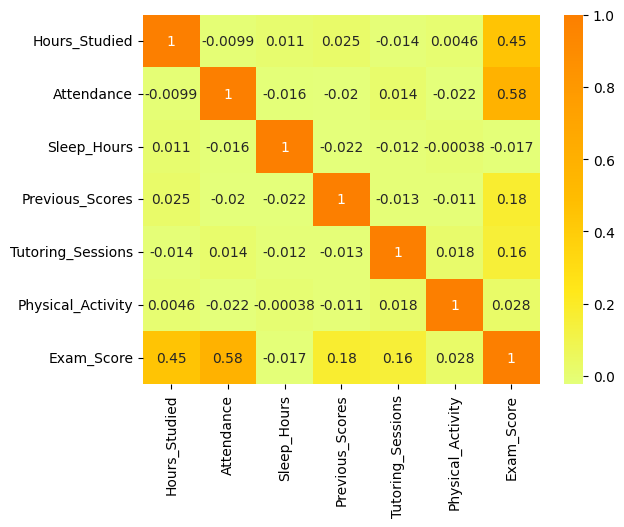

In [124]:
import seaborn as sns

corr = df.select_dtypes('number').corr()

sns.heatmap(corr, cmap = 'Wistia',annot=True)

as observed above, no correlation between the variables

Let's visualize using the matplotlib library the presence of outliers in the columns 'Hours_Studied' 'Tutoring_Sessions' 

Text(0, 0.5, 'Exam_Score')

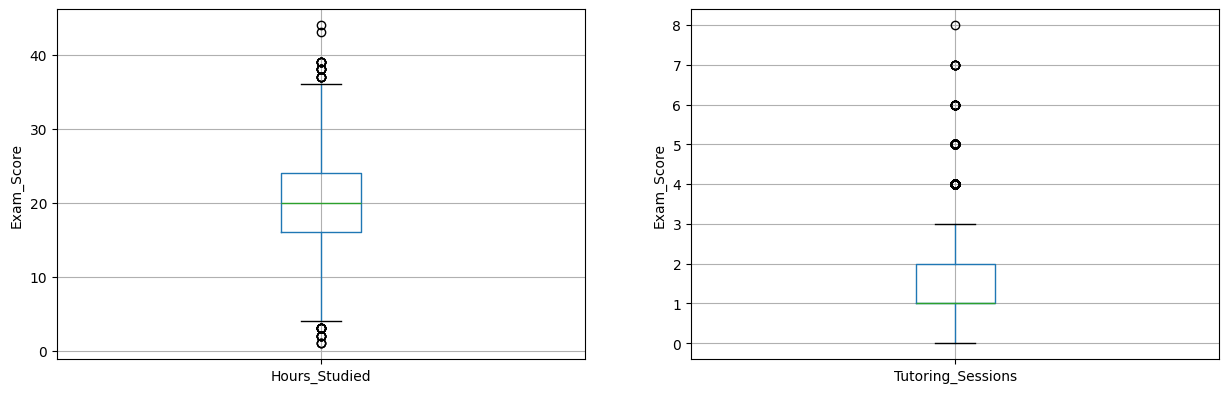

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column="Hours_Studied")
fig.set_ylabel('Exam_Score')


plt.subplot(2, 2, 2)
fig = df.boxplot(column="Tutoring_Sessions")
fig.set_ylabel('Exam_Score')





We notice the presence of outliers in these three columns

Similarly, let's check if there is any asymmetry in these two columns.

Text(0, 0.5, 'Exam_Score')

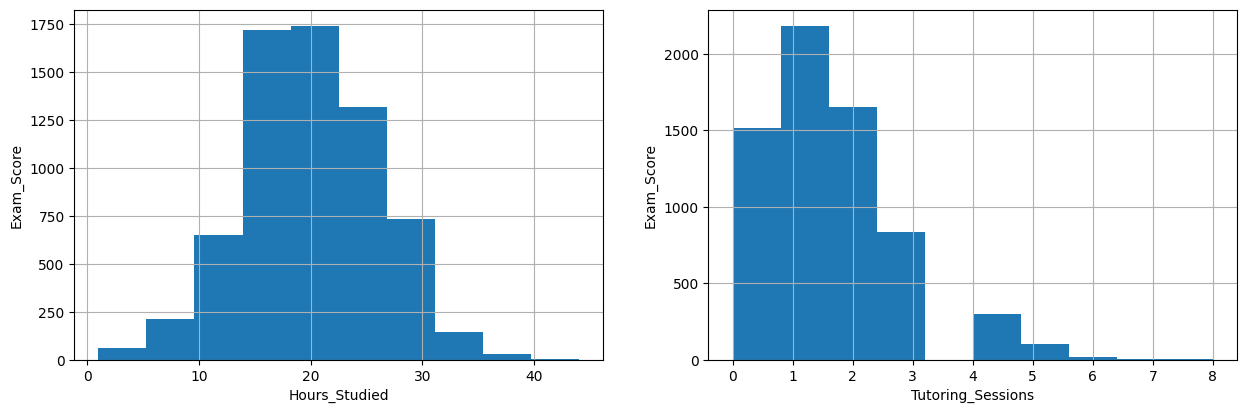

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Hours_Studied.hist(bins=10)
fig.set_xlabel('Hours_Studied')
fig.set_ylabel('Exam_Score')


plt.subplot(2, 2, 2)
fig = df.Tutoring_Sessions.hist(bins=10)
fig.set_xlabel('Tutoring_Sessions')
fig.set_ylabel('Exam_Score')



Outlier management

In [127]:
def check_and_handle_outliers(df, numerical):

    print("Checking for outliers...")
    outliers_present = False    
    
    for col in numerical:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            outliers_present = True
            print(f"\n Column: {col}")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Bounds: ({lower_bound:.2f}, {upper_bound:.2f})")
            
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if not outliers_present:
        print("No outliers found!")
    
    return df

df = check_and_handle_outliers(df, numerical)

print("\n Verifying after treatment...")
check_and_handle_outliers(df, numerical)

Checking for outliers...

 Column: Hours_Studied
Number of outliers: 43
Bounds: (4.00, 36.00)

 Column: Tutoring_Sessions
Number of outliers: 430
Bounds: (-0.50, 3.50)

 Column: Exam_Score
Number of outliers: 104
Bounds: (59.00, 75.00)

 Verifying after treatment...
Checking for outliers...
No outliers found!


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0.0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2.0,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1.0,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3.0,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1.0,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3.0,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3.0,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2.0,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Let's encode our data using LabelEncoder (for ordinals) and get_dummies (for nominals)

In [128]:
from sklearn.preprocessing import LabelEncoder

ordinals = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income",
"Teacher_Quality","Peer_Influence","Distance_from_Home"]


nominal = ["Extracurricular_Activities","Internet_Access","School_Type","Learning_Disabilities",
"Parental_Education_Level","Gender"]


df = pd.get_dummies(data=df,
                    columns=nominal,
                     drop_first=True,
                     dtype='int8')


le = LabelEncoder()

for var in ordinals:
    df[var] = le.fit_transform(df[var])

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Physical_Activity,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Gender_Male
0,23,84,1,0,7,73,1,0.0,1,2,...,3,2,67,0,1,1,0,1,0,1
1,19,64,1,2,8,59,1,2.0,2,2,...,4,1,61,0,1,1,0,0,0,0
2,24,98,2,2,7,91,2,2.0,2,2,...,4,2,74,1,1,1,0,0,1,1
3,29,89,1,2,8,98,2,1.0,2,2,...,4,1,71,1,1,1,0,1,0,1
4,19,92,2,2,6,65,2,3.0,2,0,...,4,2,70,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,7,76,2,1.0,0,2,...,2,2,68,0,1,1,0,1,0,0
6603,23,76,0,2,8,81,2,3.0,1,0,...,2,2,69,0,1,1,0,1,0,0
6604,20,90,2,1,6,65,1,3.0,1,2,...,2,2,68,1,1,1,0,0,1,0
6605,10,86,0,0,6,91,0,2.0,1,2,...,3,0,68,1,1,0,0,1,0,0


In [129]:
df.loc[283,"Exam_Score"]

np.int64(59)

Let's define our features(X) and targets(y)

In [130]:
X = df.drop(columns=[
                 "Previous_Scores",
                 "Exam_Score"
                 ], axis=1)
# cas d'indice 283 c'est l'exemple qu'on va utiliser pout verifier notre prediction
df = df.drop(index=283)
y = df["Exam_Score"]

Let's create new columns to potentially increase the performance of the model, these new columns come from the multiplication of certain existing ones

In [131]:
X["Family_incom_x_MotivationLevel"] = X["Family_Income"] * X["Motivation_Level"]
X["Learning_Disabilities_Yes_x_MotivationLevel"] = X["Learning_Disabilities_Yes"] * X["Motivation_Level"]
X["Parental_Involvement_x_Parental_Education_Level_High School"] = X["Parental_Involvement"] * X["Parental_Education_Level_High School"]
X["Parental_Involvement_x_Parental_Education_Level_Postgraduate"] = X["Parental_Involvement"] * X["Parental_Education_Level_Postgraduate"]
X["Sleep_Hours_x_Motivation_Level"] = X["Sleep_Hours"] * X["Motivation_Level"]
cols = X.columns

for i in range(len(cols)):
    if cols[i] != "Hours_Studied" and "Hours_Studied" not in cols[i]:
        X["Hours_Studied" + '_x_' + cols[i]] = X["Hours_Studied"] * X[cols[i]]
    if cols[i] != "Attendance" and "Attendance" not in cols[i]:
        X["Attendance" + '_x_' + cols[i]] = X["Attendance"] * X[cols[i]]
X.drop("Hours_Studied_x_Attendance",inplace=True, axis=1)     

cols = X.columns
       
for i in range(len(cols)):
    if cols[i] != "Hours_Studied" and "Hours_Studied" not in cols[i]:
        X["Hours_Studied" + '_x_' + cols[i]] = X["Hours_Studied"] * X[cols[i]]
    elif cols[i] != "Attendance" and "Attendance" not in cols[i]:
        X["Attendance" + '_x_' + cols[i]] = X["Attendance"] * X[cols[i]]

cols = X.columns
for i in range(len(cols)):
    if "Hours_Studied_x_Attendance" in cols[i]:
        X.drop(cols[i], inplace=True, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_15524\143072218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["Attendance" + '_x_' + cols[i]] = X["Attendance"] * X[cols[i]]
C:\Users\dell\AppData\Local\Temp\ipykernel_15524\143072218.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X["Hours_Studied" + '_x_' + cols[i]] = X["Hours_Studied"] * X[cols[i]]
C:\Users\dell\AppData\Local\Temp\ipykernel_15524\143072218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Let's visualize the new columns created

In [132]:
X.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Sleep_Hours', 'Motivation_Level',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
       'Peer_Influence', 'Physical_Activity', 'Distance_from_Home',
       'Extracurricular_Activities_Yes', 'Internet_Access_Yes',
       'School_Type_Public', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Gender_Male',
       'Family_incom_x_MotivationLevel',
       'Learning_Disabilities_Yes_x_MotivationLevel',
       'Parental_Involvement_x_Parental_Education_Level_High School',
       'Parental_Involvement_x_Parental_Education_Level_Postgraduate',
       'Sleep_Hours_x_Motivation_Level', 'Attendance_x_Hours_Studied',
       'Hours_Studied_x_Parental_Involvement',
       'Attendance_x_Parental_Involvement',
       'Hours_Studied_x_Access_to_Resources',
       'Attendance_x_Access_to_Resources', 'Hours_Studied_x_Sleep

In [133]:
X.columns.size

91

now let's manage the outliers produced following our modifications

In [134]:
columns = X.columns
X = check_and_handle_outliers(X, columns)

print("\n Verfication après le traitement...")
check_and_handle_outliers(X, columns)

Checking for outliers...

 Column: Internet_Access_Yes
Number of outliers: 499
Bounds: (1.00, 1.00)



 Column: Learning_Disabilities_Yes
Number of outliers: 695
Bounds: (0.00, 0.00)

 Column: Parental_Education_Level_Postgraduate
Number of outliers: 1305
Bounds: (0.00, 0.00)

 Column: Learning_Disabilities_Yes_x_MotivationLevel
Number of outliers: 547
Bounds: (0.00, 0.00)

 Column: Parental_Involvement_x_Parental_Education_Level_Postgraduate
Number of outliers: 940
Bounds: (0.00, 0.00)

 Column: Attendance_x_Hours_Studied
Number of outliers: 45
Bounds: (150.00, 3014.00)

 Column: Hours_Studied_x_Sleep_Hours
Number of outliers: 76
Bounds: (-1.00, 279.00)

 Column: Attendance_x_Sleep_Hours
Number of outliers: 24
Bounds: (153.00, 961.00)

 Column: Hours_Studied_x_Tutoring_Sessions
Number of outliers: 60
Bounds: (-41.00, 95.00)

 Column: Hours_Studied_x_Family_Income
Number of outliers: 13
Bounds: (-21.50, 70.50)

 Column: Hours_Studied_x_Physical_Activity
Number of outliers: 97
Bounds: (-14.00, 130.00)

 Column: Attendance_x_Physical_Activity
Number of outliers: 140
Bounds: (13.50, 457.5

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Attendance_x_Hours_Studied_x_School_Type_Public,Attendance_x_Hours_Studied_x_Learning_Disabilities_Yes,Attendance_x_Hours_Studied_x_Parental_Education_Level_High School,Attendance_x_Hours_Studied_x_Parental_Education_Level_Postgraduate,Attendance_x_Hours_Studied_x_Gender_Male,Attendance_x_Hours_Studied_x_Family_incom_x_MotivationLevel,Attendance_x_Hours_Studied_x_Learning_Disabilities_Yes_x_MotivationLevel,Attendance_x_Hours_Studied_x_Parental_Involvement_x_Parental_Education_Level_High School,Attendance_x_Hours_Studied_x_Parental_Involvement_x_Parental_Education_Level_Postgraduate,Attendance_x_Hours_Studied_x_Sleep_Hours_x_Motivation_Level
0,23,84,1,0,7,1,0.0,1,2,2,...,1932,0,1932,0,1932,1932,0,1932,0,13524
1,19,64,1,2,8,1,2.0,2,2,0,...,1216,0,0,0,0,2432,0,0,0,9728
2,24,98,2,2,7,2,2.0,2,2,1,...,2352,0,0,0,2352,9408,0,0,0,32928
3,29,89,1,2,8,2,1.0,2,2,0,...,2581,0,2581,0,2581,10080,0,2581,0,41296
4,19,92,2,2,6,2,3.0,2,0,1,...,1748,0,0,0,0,6992,0,0,0,20976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,7,2,1.0,0,2,2,...,1725,0,1725,0,0,0,0,0,0,24150
6603,23,76,0,2,8,2,3.0,1,0,2,...,1748,0,1748,0,0,3496,0,0,0,27968
6604,20,90,2,1,6,1,3.0,1,2,0,...,1800,0,0,0,0,1800,0,0,0,10800
6605,10,86,0,0,6,0,2.0,1,2,2,...,0,0,860,0,0,0,0,0,0,0


lets prepare our sample of index 283 in X

In [135]:
m = X.loc[283]
X = X.drop(index=283)

cols = X.columns
test = {}
for key, val in zip(cols, m):
    test[key] = [val]

v = pd.DataFrame(test, columns=X.columns)
v

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Attendance_x_Hours_Studied_x_School_Type_Public,Attendance_x_Hours_Studied_x_Learning_Disabilities_Yes,Attendance_x_Hours_Studied_x_Parental_Education_Level_High School,Attendance_x_Hours_Studied_x_Parental_Education_Level_Postgraduate,Attendance_x_Hours_Studied_x_Gender_Male,Attendance_x_Hours_Studied_x_Family_incom_x_MotivationLevel,Attendance_x_Hours_Studied_x_Learning_Disabilities_Yes_x_MotivationLevel,Attendance_x_Hours_Studied_x_Parental_Involvement_x_Parental_Education_Level_High School,Attendance_x_Hours_Studied_x_Parental_Involvement_x_Parental_Education_Level_Postgraduate,Attendance_x_Hours_Studied_x_Sleep_Hours_x_Motivation_Level
0,13.0,69.0,2.0,1.0,5.0,1.0,0.0,0.0,2.0,2.0,...,897.0,0.0,897.0,0.0,0.0,0.0,0.0,1794.0,0.0,4485.0


Splitting data into test and train data

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=42,test_size=0.25 )


In [137]:
numerical.remove("Previous_Scores")
numerical.remove("Exam_Score")

numerical.remove("Hours_Studied")
numerical.remove("Attendance")
numerical

['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

Now let's store all columns that contain 'Hours_Studied' or 'Attendance'

In [138]:
for var in X.columns:
    if "Hours_Studied" in var or "Attendance" in var:
        numerical.append(var)

Data scaling phase, here we will use the StandardScaler and MinMaxScaler functions, the first at the feature level because it will use the tanh function as an activation function and the second at the target level because it will use the sigmoid

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_X = StandardScaler() # for the features because we will use the tanh function as an activation function
scaler_y = MinMaxScaler() # for the targets because we will use the sigmoid function

X_train_numerical = X_train[numerical]
X_test_numerical = X_test[numerical]

X_train_categorical = X_train.drop(columns=numerical, axis=1)
X_test_categorical = X_test.drop(columns=numerical, axis=1)

# StandardScaler
X_train_standardized = scaler_X.fit_transform(X_train_numerical)
X_test_standardized = scaler_X.transform(X_test_numerical)

X_train_standardized = pd.DataFrame(X_train_standardized, columns=numerical, index=X_train.index)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=numerical, index=X_test.index)

X_train_all = pd.concat([X_train_standardized, X_train_categorical], axis=1)
X_test_all = pd.concat([X_test_standardized, X_test_categorical], axis=1)

# MinMaxScaler
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# v our test prediction which has the Exam Score = 59

v_categorical = v.drop(columns=numerical, axis=1)

v_standardized = scaler_X.transform(v[numerical])

v_standardized = pd.DataFrame(v_standardized, columns=numerical, index=v.index)
v_all = pd.concat([v_standardized, v_categorical], axis=1)

Establishing the Neural Network: this part contains the import of the functions to be used in the tensorflow keras library, a data check, data extraction and division into sets, creation of the Neural Network, configuration of the optimizer and compilation, callbacks for the training control and then training the model

In [ ]:
def Neural_Network(neurons=[],hidden_layer=1,opti="SGD",iter=1000,batch_size=None,show_iter=100,iter_stop=100,data={"X_train":[],"y_train":[],"X_test":[],"y_test":[]}):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.optimizers import Adamax,SGD,Adam
    from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,Callback
    from tensorflow.keras.initializers import GlorotUniform

    # Check if the key exists and if the corresponding value is not empty
    for key in data:
        if key in data:
            # Check if the value is a pandas DataFrame
            if isinstance(data[key], pd.DataFrame):
                if not data[key].empty:
                    continue
                else:
                    raise ValueError(f"Missing or empty data for {key}")
            
            # Check if the value is a numpy ndarray
            elif isinstance(data[key], np.ndarray):
                if data[key].size > 0:
                    continue
                else:
                    raise ValueError(f"Missing or empty data for {key}")
            
            else:
                raise ValueError(f"Unsupported data type for {key}")
    # Data extraction and division into sets
    try:
        X_train = data["X_train"]
        y_train = data["y_train"]
        X_test = data["X_test"]
        y_test = data["y_test"]
    except KeyError as err:
        print(f"KeyError: Missing key {err} in the data")
        X_train = y_train = X_test = y_test = None  
    

    # Test set & Validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # kernel_initializer=GlorotUniform()
    input_dim = len(X_train.columns)

    # Create the Neural Network
    if len(neurons) != hidden_layer + 1:
        return Exception("neurons length does not shape with the number of the layers")
    
    model = Sequential([
            Dense(neurons[0], activation='tanh', input_dim=input_dim, use_bias=True , kernel_initializer=GlorotUniform()), 
            Dropout(0.4)])
    
    try:
        for i in range(1,hidden_layer+1):
            model.add(Dense(neurons[i], activation='tanh',  use_bias=True , kernel_initializer=GlorotUniform()))
            model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid', use_bias=True, kernel_initializer=GlorotUniform()))
    except KeyError as err:
        print(f"KeyError: Missing key {err}")

    # Optimizer Configuration and Compilation
    opti_obj = {"Adam" : Adam,
            "SGD" : SGD,
            "Adamax" : Adamax}
    opti_method = Adam

    for key,val in enumerate(opti):
        if str(opti).lower() == str(key).lower(): 
            opti_method = opti_obj[key]
            print(f"Optimizer: {opti_method}")
            break
    
    opt = opti_method(learning_rate=0.001)  
    model.compile(optimizer=opt,
                loss='mse', 
                metrics=['mae'])

    # Callbacks for drive control
    early_stopping = EarlyStopping(
        monitor='val_loss',  
        patience=iter_stop,        
        restore_best_weights=True  
    )
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


    class CustomLogger(Callback):
        def __init__(self, display_interval):
            super().__init__()
            self.display_interval = display_interval

        def on_epoch_end(self, epoch, logs=None):
            if (epoch + 1) % self.display_interval == 0:
                print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, mae = {logs.get('mae', 'N/A')}")

    # Model training            
    try:
        if batch_size and type(batch_size) == int :           
            model.fit(X_train,
                    y_train, 
                    validation_data=(X_val, y_val),
                    epochs=iter, 
                    batch_size=batch_size, 
                    verbose=0,
                    callbacks=[CustomLogger(display_interval=show_iter),early_stopping,checkpoint]
                    )
        else :
            model.fit(X_train,
                    y_train, 
                    validation_data=(X_val, y_val),
                    epochs=iter, 
                    verbose=0,
                    callbacks=[CustomLogger(display_interval=show_iter),early_stopping,checkpoint]
                    )
    except KeyError as err:
        print(f"KeyError: {err} value is invalid")

    return model,X_train, y_train
    
        

Now let's use this neural network on our data and predict the test data

In [ ]:
data={
        "X_train":X_train_all,
        "y_train":y_train_normalized,
       "X_test":X_test_all,
       "y_test":y_test_normalized}

model,X_train,y_train = Neural_Network(neurons=[1240,1240],iter=10000,iter_stop=500,batch_size=320,show_iter=100,data=data,opti="Adamax",hidden_layer=1)

loss, mae = model.evaluate(X_test_all, y_test_normalized)
print(f"Loss: {loss }, MAE: {mae}")

application of the R² Score metric on our neural network

In [142]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_all)
y_train_pred = model.predict(X_train)

r2_score(y_test_normalized, y_pred),r2_score(y_train, y_train_pred)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(0.8310806761994018, 0.9034555593118284)

Now the prediction of our test that we prepared it before, which had the Exam Score = 59

In [143]:
# Prédiction
prediction_normalized = model.predict(v_all)
prediction = scaler_y.inverse_transform(prediction_normalized)  
print(f"Prédiction dé-normalisées : {prediction}") 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prédiction dé-normalisées : [[61.948586]]


Checking of overfitting 

In [144]:
loss, mse = model.evaluate(X_train, y_train)
loss, mse = model.evaluate(X_test_all, y_test_normalized)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0999 - mae: 0.2192
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1814 - mae: 0.3136


Let's visualize the feature importances for our model

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━

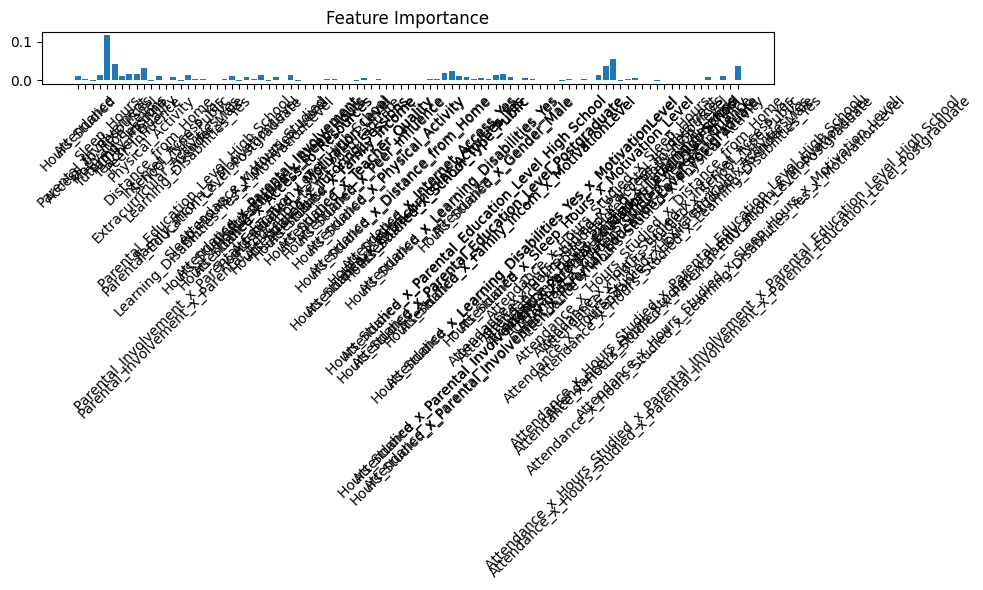


Top 10 important features:
Teacher_Quality: 0.0172
Attendance_x_Gender_Male: 0.0172
Attendance_x_School_Type_Public: 0.0176
Hours_Studied_x_Learning_Disabilities_Yes: 0.0228
Peer_Influence: 0.0309
Attendance_x_Hours_Studied_x_Sleep_Hours_x_Motivation_Level: 0.0365
Attendance_x_Hours_Studied_x_Motivation_Level: 0.0378
Motivation_Level: 0.0432
Attendance_x_Hours_Studied_x_Tutoring_Sessions: 0.0543
Sleep_Hours: 0.1182


In [145]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def get_feature_importance(model, x_val, Y_val, feature_names=None):

    if hasattr(x_val, 'values'):
        x_val_np = x_val.values
    else:
        x_val_np = x_val
        
    baseline_score = mean_squared_error(Y_val, model.predict(x_val))
    importance_scores = []
    
    for i in range(x_val_np.shape[1]):

        X_permuted = x_val_np.copy()

        X_permuted[:, i] = np.random.permutation(X_permuted[:, i])

        new_score = mean_squared_error(Y_val, model.predict(X_permuted))

        importance = new_score - baseline_score
        importance_scores.append(importance)
    

    if feature_names is None:
        feature_names = [f'Feature {i+1}' for i in range(len(importance_scores))]
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, importance_scores)
    plt.xticks(rotation=45)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_scores


feature_names = X_test.columns 
perm_importance = get_feature_importance(model, X_test_all, y_test_normalized, feature_names)


print("\nTop 10 important features:")
for idx in np.argsort(perm_importance)[-10:]:
    print(f"{feature_names[idx]}: {perm_importance[idx]:.4f}")